In [ ]:
# END DEVICE : Emetteur
from digi.xbee.devices import XBeeDevice
device = XBeeDevice("/dev/ttyUSB0", 9600)
device.open()
while 1:
    device.send_data_broadcast("Hello XBee World!\n Sexy Boys")
device.close()

In [ ]:
# ROUTEUR : Récepteur

from digi.xbee.devices import XBeeDevice
xdevice = XBeeDevice("/dev/ttyUSB1", 9600)
#xdevice.close()
xdevice.open()
#x=device.read_data()
NEW_TIMEOUT_FOR_SYNC_OPERATIONS = 5 # 5 seconds
# Instantiate a remote ZigBee device object.
# Read data.
xbee_message = xdevice.wait_read_frame()
# Read data sent by the remote device.
print(xbee_message)


In [ ]:
xbee_message

In [8]:
TEAM_ID= 'CS08'
FILE_NAME = 'CANSAT2018_TLM_' + TEAM_ID + '.csv'
HEADER_ROW = ['TEAM_ID','MISSION_TIME','ALT_SENSOR','OUTSIDE_TEMP','INSIDE_TEMP',
'VOLTAGE','FSW_STATE','BONUS']
import serial 
import csv
coord = serial.Serial(
# port série du Xbee récepteur
 port='/dev/ttyUSB1',
 baudrate = 9600,
 parity=serial.PARITY_NONE,
 stopbits=serial.STOPBITS_ONE,
 bytesize=serial.EIGHTBITS,
 timeout=15
)
coord.close()
coord.open()
SERIAL_PORT = '/dev/ttyUSB1'
BAUD_RATE = 9600


ser = serial.Serial(SERIAL_PORT,BAUD_RATE)
myFile = open(FILE_NAME,'w')
writer = csv.writer(myFile)
writer.writerow(HEADER_ROW)
with serial.Serial('/dev/ttyUSB1', 9600, timeout=15) as ser:
#x = ser.read()          # read one byte
    s = ser.read(64)        # read up to ten bytes (timeout)
#line = ser.readline()   # read a '\n' terminated line

    print(s)



b'~\x00<\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8\x00\x11\xc1\x05\x011654,4789,-15435,4564631,444654,156432,0\x00\x00\xef'


In [4]:
s = b'~\x00\x18\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8'

c = 0
k = [0] * 12
print(k)
for x in range(1,10):
    k[x] = s[x]
print(s)    
nchars = len(s)
# string to int or long. Type depends on nchars
#x = sum(ord(k[byte])<<8*(nchars-byte-1) for byte in range(nchars))
# int or long to string
tel = ''.join(chr((x>>8*(nchars-byte-1))&0xFF) for byte in range(nchars))
print(tel)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b'~\x00\x18\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8'
               	


Affichage des caractères
b'~\x00<\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8\x00\x11\xc1\x05\x011654,4789,-15435,4564631,444654,156432,0\x00\x00\xef'
La valeur b [49, 54, 53, 52, 44, 52, 55, 56, 57, 44, 45, 49, 53, 52, 51, 53, 44, 52, 53, 54, 52, 54, 51, 49, 44, 52, 52, 52, 54, 53, 52, 44, 49, 53, 54, 52, 51, 50, 44, 48, 0, 0, 239]
b'1654,4789,-15435,4564631,444654,156432,0\x00\x00\xef'
t vaut : b'1654,4789,-15435,4564631,444654,156432,0'
12517445834977718690871303062915331058107903640439969296011451776351672846876115387773892529955201735781555899802051906377378099552569963118616107672141950
xx ['1654', '4789', '-15435', '4564631', '444654', '156432', '0']
ax 1654
ay 4789
az -15435
t 4564631
p 4564631
h 4564631
status 0
['1654', '4789', '-15435', '4564631', '444654', '156432', '0']
pol :  b'342c'



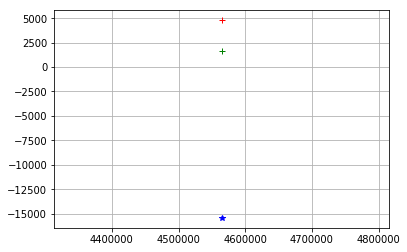

In [1]:
#pretty_value = s.join(s)
import sys
from matplotlib import pyplot 
import pandas as pd
import binascii
import base64
import numpy as np

%matplotlib inline
s=b'~\x00\x19\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8\x00\x11\xc1\x05\x01hello\x00\xcb'
s=b'~\x00\x19\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8\x00\x11\xc1\x05\x0115,12,\x00'
s=b'~\x00<\x91\x00\x13\xa2\x00@c\xd1\xbe\x00\x00\xe8\xe8\x00\x11\xc1\x05\x011654,4789,-15435,4564631,444654,156432,0\x00\x00\xef'
#La trame est définie de la manière suivante
#Entête : 7E
#MSB : Max Significant Byte de la taille de la donnée
#LSB : Least Significant Byte de la taille de la donnée
#API Frame Type :
#DATA on N bytes (N = MSB LSB)
#
# Exemple trame ='7E 00 19 91 00 13 A2 00 40 63 D1 BE 00 00 E8 E8 00 11 C1 05 01 43 6F 75 63 6F 75 00 71 '

#MSB = 00
#LSB = 19
#Frame type : 91
#DATA : 

#################### DATA 1 -> 4 : MSB ADDRESS of the Transmitter
#DATA 01 = 00
#DATA 02 = 13
#DATA 3 = A2
#DATA 4 = 00
#################### DATA 5 ->8 : LSB ADDRESS of the Transmitter
#DATA 5 = 40
#DATA 6 = 63
#DATA 7 = D1
#DATA 8 = BE
#####################
#DATA 9 = 00
#DATA 10 = 00
#DATA 11 = E8
#DATA 12 = E8
#DATA 13 = 00
#DATA 14 = 11
#DATA 15 = C1
#DATA 16 = 05
#DATA 17 = 01
#DATA 18 = 43 -> C
#DATA 19 = 6F -> o
#DATA 20 = 75 -> u
#DATA 21 = 63 -> c
#DATA 22 = 6F -> o
#DATA 23 = 75 -> u
#DATA 24 = 00
#DATA 25 = 71
print('Affichage des caractères')




def SendStr(self, msg, addr=0xFFFF, options=0x01, frameid=0x00):
        return self.Send(msg.encode('utf-8'), addr, options, frameid)

#source = unicode(source, 'utf-8')
print(s)
a=list(s)


b=a[21:64]
print('La valeur b',b)
print(bytes(b))
b=b'1,4,7,9'
t=s[21:61]
print('t vaut :',t)
print(int.from_bytes(a, byteorder='little'))

    
#trame ='7E 00 19 91 00 13 A2 00 40 63 D1 BE 00 00 E8 E8 00 11 C1 05 01 43 6F 75 63 6F 75 00 71 '
#print(trame[0:6])
text = str(b)[1:]

xx= t.decode('ascii').split(',')
(ax,ay,az,t,p,h,stat)=[int(_) for _ in t.decode('ascii').strip().split(',')]
print("xx",xx)

print("ax",ax)
print("ay",ay)
print("az",az)
print("t",t)
print("p",t)
print("h",t)
print("status",stat)
pyplot.figure()
pyplot.plot(t,ax,'g+-')
pyplot.plot(t,ay,'r+-')
pyplot.plot(t,az,'b*-')
pyplot.grid()
b[0:3]
print(xx)


pol = binascii.hexlify(s)
print('pol : ',pol[48:52])
y=str(b,'ascii')
print(y[44:50])

b'spam'
b'15,12'
<class 'bytes'>
15,12
['1', '5', ',', '1', '2']
0    15,12
dtype: object


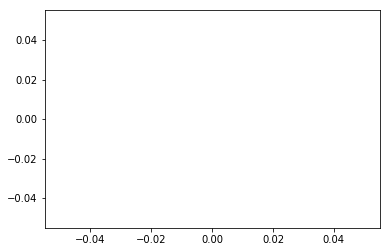

In [72]:
import codecs 
print(bytes.fromhex('7370616d')) 
t=s[21:26]
print(t)
print(type(t))
l=t.decode('utf8')
m=l
print(m)

mm = list(m)
ll = list(l)
print(mm)
ol=pd.Series(l)
print(ol)
ml = pd.Series(l)
pyplot.plot(ml[1:],ol[1:])
#numbers = b.encode('utf8')
bin_repr = lambda s, coding="ascii": ' '.join('{0:01d}'.format(c) for c in s.encode(coding))
print(bin_repr("Bonjour"))


In [ ]:
s=" "
seq=["ab", "cd", "ef"]
print(s.join(seq))
b=bytearray('bb a7 f6 92'.replace(' ','')).decode('hex')

In [ ]:
import serial
import time
from xbee import XBee


def decodeReceivedFrame(data):
            source_addr_long = hex(data['source_addr_long'])
            source_addr = hex(data['source_addr'])
            id = data['id']
            samples = data['samples']
            options = hex(data['options'])
            return [source_addr_long, source_addr, id, samples]

decodedData = decodeReceivedFrame(s)
print(decodedData)

In [ ]:
print(str(s))
for c in range(1,5):
    print(ord(str(c))

In [ ]:
value = '\x13\xa2\x00@y\xe6_'
print(value)
print(s)
print(len(s))
print(type(s))
print(s.decode('cp855'))

'c'